In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize,TweetTokenizer
import re
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('Elon_musk.csv',encoding= 'Latin-1')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
df.drop(columns='Unnamed: 0',inplace= True)

In [4]:
df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
txt = ' '.join(df.Text)
txt

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [6]:
len(txt)

158805

In [7]:
txt[0]

'@'

In [8]:
# remove https or url within text
no_url_text=re.sub(r'http\S+', '', txt)
no_url_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.  @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest  @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha  @freewalletorg Any crypto wallet 

In [9]:
len(no_url_text)

143791

In [10]:
no_url_text[0]

'@'

In [11]:
#Tokeniazation

In [12]:
#Removing usernames
tokenizer = TweetTokenizer(strip_handles=True)
tweet_tokens=tokenizer.tokenize(no_url_text)
print(tweet_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', ',', 'but'

In [13]:
# Again Joining the list into one string/text
sent_tokens_text=' '.join(tweet_tokens)
sent_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! Frodo was the underdoge , All thought he would fail , Himself most of all . Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission ! Yes Once we can pre

In [14]:
len(sent_tokens_text)

103502

In [15]:
sent_tokens_text[0]

'I'

In [16]:
sentence = sent_tokenize(sent_tokens_text)
sentence

['I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level .',
 'Have you tried it ?',
 'Great interview !',
 'Doge is underestimated Congratulations Tesla China for amazing execution last year .',
 'Now on to the next for even more !',
 '!',
 'Happy New Year of the Ox !',
 'Frodo was the underdoge , All thought he would fail , Himself most of all .',
 'Haha thanks :) Indeed !',
 'Tweets definitely do not represent real-world time allocation .',
 'The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway toge

In [17]:
len(sentence)

976

In [18]:
sentence[0]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level .'

In [19]:
#Cleaning the data

In [20]:
corpus = []

for i in range(len(sentence)):
    txt = re.sub('[^a-zA-Z0-9]',' ',sentence[i])
    txt = txt.lower()
    corpus.append(txt)

In [21]:
corpus

['i   m an alien ray tracing on cyberpunk with hdr is next level  ',
 'have you tried it  ',
 'great interview  ',
 'doge is underestimated congratulations tesla china for amazing execution last year  ',
 'now on to the next for even more  ',
 ' ',
 'happy new year of the ox  ',
 'frodo was the underdoge   all thought he would fail   himself most of all  ',
 'haha thanks    indeed  ',
 'tweets definitely do not represent real world time allocation  ',
 'the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it   s getting real bought some dogecoin for lil x   so he can be a toddler hodler he definitely has issues   but the sentencing seems a bit high thanks for fixing please unlock my account  u 0001f923   u 0001f923  this is true power haha any crypto wallet that won   t give you your private keys should be avoided at all costs your app sucks rt   nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on o

In [22]:
len(corpus)

976

In [23]:
corpus[0]

'i   m an alien ray tracing on cyberpunk with hdr is next level  '

In [24]:
#Stemming

In [25]:
stemmer = PorterStemmer()

In [26]:
for i in corpus:
      words = word_tokenize(i)
      print(words)

['i', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level']
['have', 'you', 'tried', 'it']
['great', 'interview']
['doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year']
['now', 'on', 'to', 'the', 'next', 'for', 'even', 'more']
[]
['happy', 'new', 'year', 'of', 'the', 'ox']
['frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all']
['haha', 'thanks', 'indeed']
['tweets', 'definitely', 'do', 'not', 'represent', 'real', 'world', 'time', 'allocation']
['the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'it', 's', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixi

['dragon', 'performing', '4', 'departure', 'burns', 'to', 'move', 'away', 'from', 'the', 'rt', 'crew', 'dragon', 'will', 'depart', 'the', 'with', 'and', 'in', 'about', '6', 'hours', 'and', 'splash', 'down', 'off', 'the', 'coast', 'of', 'the', 'simplest', 'solution', 'is', 'not', 'necessarily', 'the', 'most', 'satisfying', 'rt', 'tesla', 'autopilot', 'accidents', '1', 'out', 'of', '4', '530', '000', 'miles', 'us', 'average', '1', 'out', 'of', '479', '000', 'miles', 'rt', 'tesla', 'q2', 'vehicle', 'safety', 'report', 'u', '0001f9d9', 'u', '200d', 'u', '2642', 'u', 'fe0f', 'absolutely']
['long', 'lasting', 'art', 'is', 'incredibly', 'difficult']
['this', 'bbc', 'article', 'provides', 'a', 'sensible', 'summary', 'for', 'how', 'it', 'was', 'done', 'rt', 'news', 'teams', 'from', 'and', 'remain', 'go', 'with', 'plans', 'to', 'bring', 'and', 'home', 'to', 'earth', 'on', 'sunday', 'rt', 'they', 're', 'coming', 'home']
['u', '0001f30e', 'u', '0001fa82', 'on', 'aug']
['1', 'astronauts', 'and', 'w

In [27]:
for i in corpus:
    words = word_tokenize(i)
    for i in words:
        if i not in stopwords.words('english'):
            print(stemmer.stem(i)) 

alien
ray
trace
cyberpunk
hdr
next
level
tri
great
interview
doge
underestim
congratul
tesla
china
amaz
execut
last
year
next
even
happi
new
year
ox
frodo
underdog
thought
would
fail
haha
thank
inde
tweet
definit
repres
real
world
time
alloc
entertain
outcom
like
sent
agre
clubhous
get
real
bought
dogecoin
lil
x
toddler
hodler
definit
issu
sentenc
seem
bit
high
thank
fix
pleas
unlock
account
u
0001f923
u
0001f923
true
power
haha
crypto
wallet
give
privat
key
avoid
cost
app
suck
rt
nasa
select
falcon
heavi
launch
first
two
element
lunar
gateway
togeth
one
mission
ye
predict
cash
flow
reason
well
starlink
ipo
starlink
staggeringli
difficult
technic
econom
endeavor
howev
spacex
need
pass
deep
chasm
neg
cash
flow
next
year
lowest
cost
per
ton
carbon
sequest
net
valu
product
made
must
scalabl
g
meant
price
countri
differ
tax
ship
intend
earth
may
idea
appli
mar
u
0001f923
u
0001f923
xprize
team
manag
100m
carbon
captur
prize
everyon
tesla
receiv
stock
comp
stock
option
take
tabl
miss
back
w

commun
time
time
super
support
public
space
around
product
launch
site
wherev
done
catapult
high
air
land
roof
base
jump
parachut
way
travel
actual
restaur
spacex
build
futurist
bar
top
h
increas
fun
hope
neither
one
best
tesla
solar
roof
instal
mayb
one
day
ye
would
best
way
larg
solar
field
reactor
need
po
sick
beat
probabl
less
dozen
primari
decis
maker
technic
three
least
option
verif
public
ascrib
credibilit
launch
underway
btw
critic
feedback
alway
super
appreci
well
way
donat
money
realli
make
differ
way
harder
seem
yup
indirectli
electr
rocket
possibl
use
electr
convert
co2
h2o
ch4
o2
get
orbit
unfortun
space
photon
emiss
power
matter
antimatt
annihila
hard
make
like
vehicl
play
long
game
true
hope
wing
work
moon
def
well
mar
also
runway
hamiltonian
2v
potenti
langrangian
play
well
back
work
strang
use
signal
ya
say
remind
timeless
classic
fast
water
tini
rock
ye
occam
razor
actual
third
like
seen
extern
observ
particip
entertain
outcom
like
dumb
dumber
great
movi
tho
call
domi

beta
2
week
fp16
least
import
digit
truncat
feel
like
fp32
bet
train
dojo
int
8
almost
heavi
lift
infer
work
great
actual
happi
thanksgiv
hope
next
month
ok
overal
air
suspens
height
damp
algorithm
haha
true
promis
greatli
need
special
color
new
roadster
origin
u
0001f923
u
0001f923
savag
u
0001f923
u
0001f923
ever
wonder
came
life
leader
launch
risk
normal
ye
slightli
fill
subject
much
debat
major
upgrad
slate
sn15
mani
small
improv
overal
similar
wire
robust
engin
mat
sn
9
sn10
lot
thing
need
go
right
mayb
1
3
chanc
good
starship
sn8
static
fire
aim
first
15km
50k
ft
altitud
flight
next
week
goal
test
3
engin
mayb
start
year
depend
starship
progress
goe
yet
bad
definit
need
engin
make
cargo
bay
propel
rapid
complet
rocket
reus
low
cost
propel
orbit
refil
propel
product
ye
still
far
simpli
video
control
biggest
game
changer
cu
fsd
beta
5
come
day
improv
signific
excit
mission
wow
yea
tomorrow
7th
flight
rocket
land
droneship
cours
still
love
sure
true
quiet
queue
product
build
better


cybertruck
accident
back
shortli
rt
20k
supercharg
count
hope
chang
booster
design
land
back
launch
mount
chip
temp
sensor
automat
maintain
safe
temp
enough
alreadi
plate
tesla
mayb
one
day
prototi
neuralink
overclock
brain
transfer
process
supercomput
extens
yo
rewrot
label
softwar
4d
differ
label
singl
phot
version
1
year
away
would
appear
calcul
incorrect
china
understand
profound
import
reusabl
era
expend
rocket
soon
u
2660
u
fe0f
u
2660
u
fe0f
tesla
autopilot
ai
team
u
2660
u
fe0f
u
2660
u
fe0f
good
explan
4d
essenti
dynam
occlud
object
especi
larg
intersect
rt
phantom
opera
insid
mind
u
0001f1e8
u
0001f1e6
u
0001f600
look
problem
solver
get
thing
done
high
sens
urgenc
care
went
school
send
resum
pleas
describ
hardest
problem
solv
exactli
solv
new
banner
need
neither
hard
left
right
anoth
fine
day
simul
faraday
invent
electr
motor
tesla
commut
free
three
phase
ac
induct
motor
maxwel
amaz
recognit
tesla
motor
inc
almost
call
faraday
420
ten
time
better
42
u
0001f917
rt
deploy
gp
ii

tile
mechan
attach
tile
compil
need
improv
imo
type
pointer
memori
problem
detect
comp
proud
say
nose
pointier
need
haha
rt
put
2020
model
long
rang
electr
suv
test
track
find
turn
well
norway
lead
world
pass
cryo
proof
u
0001f44d
yeah
contest
advanc
cast
crush
best
case
3d
print
cast
work
wel
great
pic
mayb
flag
mar
addit
manufactur
part
still
far
costli
car
rapidli
creat
tool
accel
pretti
much
think
may
end
high
note
rt
starman
last
seen
leav
earth
made
first
close
approach
mar
today
within
0
05
astronom
unit
5
mill
meant
say
fix
latest
wide
releas
need
wait
fsd
exactli
bark
tree
way
long
sigh
give
fals
sens
ye
play
sexi
snake
jazz
u
0001f923
ye
yeah
provid
metal
gear
snake
autocoupl
waymo
impress
highli
special
solut
tesla
approach
gener
solut
lat
yeah
could
put
set
allow
drop
low
5
great
render
note
need
arm
mimecraft
ye
autopilot
team
make
great
progress
realiti
sure
complic
aspir
flame
divert
boca
giant
steel
ball
haha
complet
financ
round
let
know
anoth
one
definit
need
tri
tast

remind
guy
stori
life
tunnel
citi
self
drive
electr
car
feel
like
warp
drive
first
oper
tunnel
vega
sure
good
point
hug
tunnel
today
good
analysi
exactli
gari
snail
still
win
gain
embrac
tunnel
tunnel
solut
traffic
mani
level
want
usabl
tunnel
depth
far
e
guess
probabl
mid
teen
booster
stack
orbit
pad
like
limiti
pretti
accur
simul
although
sn8
use
3
raptor
sn8
crater
sn9
sn10
close
behind
agre
major
softwar
improv
alreadi
place
extend
life
come
definit
smartwatch
phone
yesterday
technolog
neuralink
futur
seem
like
make
whole
outfit
materi
ancient
greec
commit
suicid
nobodi
dig
grave
better
true
lego
movi
awesom
stori
civil
first
book
littl
dri
second
book
life
greec
incred
wear
f
1
engin
shirt
right
cumul
mass
orbit
per
year
correc
number
realli
matter
anyon
track
tonnag
orbit
per
year
launch
vehicl
one
way
anoth
excit
guarante
support
greater
boca
padr
brownsvil
commun
much
appreci
sn8
starship
flap
nosecon
done
week
static
fire
checkout
static
fire
fli
60
000
ft
back
someon
boat
ser

realli
need
bigger
one
adult
squeez
guarante
make
parti
fun
work
well
flamethrow
favorit
one
tension
dof
compress
new
roadster
w
ye
aloha
welcom
back
space
u
0001f4ab
yeah
post
shortli
win
worst
person
ever
work
easi
real
champion
vy
titl
fair
chute
control
ship
control
close
loop
local
oper
spacex
autopilot
ms
tree
catch
fair
net
u
0001f610
rt
falcon
9
first
stage
land
cours
still
love
droneship
first
time
booster
complet
six
flight
somewher
cruis
deep
space
must
alien
ye
littl
spit
dirt
take
us
mar
human
swiftli
becom
small
percentag
total
comput
max
demonstr
raptor
thrust
225
ton
min
90
ton
actual
u
0001f4a8
engin
sn
build
sn8
ship
sn40
test
sever
upgrad
330
bar
engin
refer
330
bar
r
raptor
engin
reach
330
bar
chamber
pressur
without
explod
yeah
starship
tini
dot
20km
hard
see
nake
eye
lot
flight
impress
render
note
leg
bigger
might
sting
littl
earli
investor
part
tesla
wrong
bs
push
eberhard
worst
person
ever
also
could
long
period
comet
intersect
earth
right
observ
pretti
much
cyb

hydraul
pump
behavior
launch
pad
connector
damag
storm
fix
might
abl
whether
commerci
govern
monopoli
bad
peopl
sound
great
haha
da
kapit
nutshel
like
great
sens
humor
left
lose
middl
exactli
u
0001f923
u
0001f923
hold
beer
onion
rose
wow
think
lot
drop
u
0001f339
haha
rt
pick
energet
wallpap
charg
everyday
adventur
giga
berlin
come
togeth
imposs
seem
speed
prefabr
construct
method
almost
decad
ago
origin
dragon
background
ya
beat
br
planet
clair
u
0001f525
u
0001f525
fair
point
discuss
team
amaz
great
song
nickel
biggest
challeng
high
volum
long
rang
batteri
australia
ca
u
0001f923
u
0001f923
haha
lot
potenti
lithium
pretti
much
everywher
whoa
cool
u
0001f923
u
0001f923
blue
steel
need
high
brinel
hard
high
corros
resist
cybertruck
facet
realli
want
great
fun
could
la
austin
turn
shade
outdoor
restaur
boca
cool
ye
imposs
day
u
0001f923
u
0001f923
rt
rt
new
video
tesla
model
import
car
auto
focu
ep
5
ring
fire
know
congratul
peopl
bolivia
u
0001f1e7
u
0001f1f4
song
whistl
stranger
nigh

In [28]:
#Lemmatization

In [29]:
lemma = WordNetLemmatizer()

In [30]:
for i in corpus:
    words = word_tokenize(i)
    for i in words:
        if i not in stopwords.words('english'):
            print(lemma.lemmatize(i))  


alien
ray
tracing
cyberpunk
hdr
next
level
tried
great
interview
doge
underestimated
congratulation
tesla
china
amazing
execution
last
year
next
even
happy
new
year
ox
frodo
underdoge
thought
would
fail
haha
thanks
indeed
tweet
definitely
represent
real
world
time
allocation
entertaining
outcome
likely
sent
agree
clubhouse
getting
real
bought
dogecoin
lil
x
toddler
hodler
definitely
issue
sentencing
seems
bit
high
thanks
fixing
please
unlock
account
u
0001f923
u
0001f923
true
power
haha
crypto
wallet
give
private
key
avoided
cost
app
suck
rt
nasa
selected
falcon
heavy
launch
first
two
element
lunar
gateway
together
one
mission
yes
predict
cash
flow
reasonably
well
starlink
ipo
starlink
staggeringly
difficult
technical
economic
endeavor
however
spacex
need
pas
deep
chasm
negative
cash
flow
next
year
lowest
cost
per
ton
carbon
sequestered
net
value
product
made
must
scalable
g
meant
price
country
difference
tax
shipping
intended
earth
may
idea
apply
mar
u
0001f923
u
0001f923
xprize
team


0435
u
043f
u
0435
u
043d
important
distinction
much
increasing
rapidly
something
happens
even
better
imagined
factory
product
probably
commenting
bought
replacement
glass
junkyard
20
great
place
get
spare
part
lot
people
going
super
unhappy
west
coast
high
tech
de
facto
arbiter
free
speech
already
donated
signal
year
ago
donate
primarily
trying
advance
two
cause
sustainable
energy
extending
life
consciousness
beyond
e
u
0001f923
u
0001f923
maybe
tesla
ai
day
later
year
prancing
pony
u
0001f923
u
0001f923
u
0001f622
true
yes
long
yeah
seemed
optimistic
14
year
old
son
saxon
said
feel
like
2021
good
year
agree
let
u
make
also
thinking
spacex
boca
hold
fun
party
give
tour
community
time
time
super
support
public
space
around
production
launch
site
wherever
done
catapult
high
air
land
roof
base
jumping
parachute
way
travel
actually
restaurant
spacex
building
futuristic
bar
top
h
increase
fun
hopefully
neither
one
best
tesla
solar
roof
installation
maybe
one
day
yes
would
best
way
large
so

trillion
cell
yes
mobile
cell
colony
100
rt
tracking
footage
helicopter
today
falcon
9
launch
lc
39a
rt
something
genuinely
magical
seeing
starship
sn8
person
boca
chica
beautiful
quiet
serine
im
gespr
ch
mit
mathias
pfner
rt
dragon
separation
confirmed
spacecraft
way
autonomous
docking
tomorrow
approximately
1
rt
falcon
9
booster
landed
course
still
love
droneship
rt
liftoff
congratulation
congratulation
yes
rt
tunnel
rave
toilet
paper
u
0001f923
u
0001f923
watch
demolition
man
prometheus
unbound
rt
falcon
9
booster
supporting
mission
previously
launched
astronaut
bob
behnken
doug
hurley
bad
beast
compared
vic
20
award
accepted
behalf
great
people
tesla
spacex
neuralink
boring
co
much
people
think
science
actually
engineering
eg
thing
rocket
scientist
roc
science
discovering
essential
truth
exists
universe
engineering
creating
thing
get
bit
cold
night
paint
make
hell
difference
congrats
thanks
everything
help
build
spacex
best
memory
ever
real
soon
starship
leg
one
hardest
problem
ext

n3
gene
30
cycle
reliable
40
cycle
note
spike
protein
consider
reliable
spoke
directly
testing
lab
main
pcr
search
n1
gene
unique
strange
possible
explanation
dramatic
decline
cold
flu
prevalence
v
prior
year
someone
come
moreover
lower
true
prevalence
higher
false
positive
number
sound
obvious
sure
would
great
hear
people
know
lot
pcr
testing
industry
approximate
false
posi
interesting
interesting
general
population
knowledge
symptom
accuracy
sars
cov
2
pcr
test
possible
gene
good
pcr
test
identify
cov
2
spike
protein
although
heard
mild
sniffle
cough
slight
fever
past
day
right
symptom
although
take
nyquil
technically
tested
positive
negative
twice
positive
elon
musk
test
negati
carousel
turn
ever
faster
yup
exactly
symptom
typical
cold
nothing
unusual
far
happening
happening
others
getting
pcr
test
separate
lab
result
take
24
hour
something
extremely
bogus
going
tested
covid
four
time
today
two
test
came
back
negative
two
cam
burst
disk
worked
vehicle
appears
ok
swap
least
one
engin

mobi
haha
actually
neck
maybe
helpful
mobi
c
disc
put
c5
c6
however
1st
surgery
failed
remov
pretty
accurate
much
dna
sequencing
using
synthetic
dna
rna
fix
bug
code
london
beijing
would
cool
wow
would
quite
trip
kid
haha
r
tr
nd
look
like
snoopy
current
production
slightly
better
seem
life
solar
system
maybe
ice
europa
rt
tesla
model
3
sr
lowest
energy
consumption
bevs
say
report
creative
free
fusion
reactor
sky
conveniently
convert
4
million
ton
mass
energy
every
second
never
know
u
0001f622
also
system
autodelete
old
data
automatically
default
table
tension
yes
starting
production
7
seater
next
month
initial
delivery
early
december
gauntlet
thrown
prophecy
fulfilled
model
price
change
69
420
tonight
congratulation
making
progress
9
meter
roughly
30
ft
diameter
le
roomy
3
vacuum
rocket
engine
added
still
focus
vega
prufrock
new
tunneling
machine
sure
maybe
month
finishing
touch
need
done
station
simplified
lot
basically
tesla
tunnel
point
sweet
yes
everything
slow
phased
array
antenn

appreciate
accommodating
u
delivery
ti
time
feel
like
living
dilbert
cartoon
specie
stood
test
time
mostly
304l
301
broke
301
304
interface
sn9
8
bar
differential
ullage
9
bar
base
due
propellant
head
need
enough
height
test
body
flap
drawing
propellant
header
v
main
tank
se
first
flight
15km
50
000
ft
nosecone
front
flap
next
week
sn9
next
month
starship
sn8
rear
body
flap
sure
true
rt
falcon
9
launch
super
cool
interstellar
mapping
acceleration
probe
imap
help
researcher
better
bad
exactly
sandy
munro
understands
engineering
turn
mostly
press
letter
u
0001f4a9
typewriter
u
0001f923
centaur
bow
obviously
haha
something
like
support
3
wheel
vehicle
safe
enough
9007mm
something
appealing
hawking
hartle
idea
agree
turok
feldbrugge
lehners
u
0001f5a4
ur
algo
true
practical
size
constraint
big
fit
engine
comp
seem
problem
could
probably
increase
area
ratio
given
330
bar
max
de
preburners
ignite
main
chamber
prediction
probability
inaccurate
energy
time
besides
genetic
engineering
slow
unle

pretty
much
good
summary
conceptual
telepathy
rt
ever
fantasize
1880s
engineer
working
edison
lab
apply
work
ahem
starting
soon
physic
either
impossible
trivial
impossible
understand
becomes
trivial
e
rutherford
giant
gap
experimental
medical
device
use
patient
extreme
medical
problem
wid
testing
shorter
rvac
skirt
went
well
full
length
skirt
test
coming
soon
neuralink
product
demo
3
hour
webcast
raptor
reached
230
mt
f
half
million
pound
thrust
peak
pressure
wit
good
chance
something
slip
yeah
sunday
intense
need
2
engine
boring
co
tunnel
vega
month
operational
neuralink
month
tesla
next
month
spacex
probably
october
made
lot
progre
soon
quite
accurate
number
sure
come
lot
u
0001f923
u
0001f923
fine
reasonable
drone
footage
need
fair
distance
coming
r
thanks
smart
hardworking
team
tesla
sure
wild
time
much
appreciated
serious
attack
brave
starhopper
carried
day
many
day
obtuse
good
although
think
work
esthetically
folded
c
actually
nothing
surprised
hear
across
road
adding
silicon
car

2m
height
think
get
veloci
raptor
w
par
merlin
latter
also
look
crazy
tall
booster
fairing
122m
394
ft
ok
apart
failing
quarantine
elderly
risk
people
early
mistake
recognize
right
good
piece
giga
berlin
construction
seems
increasingly
likely
rt
falcon
9
first
stage
landed
course
still
love
droneship
gon
na
great
sn5
rt
looking
model
rt
starship
take
flight
several
short
hop
smooth
launch
process
go
high
altitude
body
flap
soon
v1
1
leg
60
longer
v2
0
leg
much
wider
taller
like
falcon
bu
progress
accelerating
rt
launch
starship
sn5
launched
150
meter
test
hop
spacex
boca
chica
power
raptor
sn27
sn5
h
exactly
mar
looking
real
possible
flight
3
min
likely
true
highly
likely
road
true
fact
scrubbed
day
raptor
turbopump
spin
start
valve
open
triggering
automatic
abo
boca
control
room
hop
attempt
33
minute
rt
going
go
moon
going
base
moon
going
send
people
mar
make
sure
tbh
must
confess
occasionally
pontificating
high
concept
thing
pretty
much
nosecone
closing
recommended
required
safe
entr

set
tour
maybe
manufactured
5
min
lax
contribute
chromosome
mitochondrion
constant
except
mutation
yes
one
part
surgery
scale
must
fully
automated
like
lasik
would
solve
lot
brain
spine
injury
ultimately
essential
ai
symbiosis
fermi
awesome
understood
right
question
ask
rt
u
0001f923
u
0001f923
bde
come
hulk
never
loses
pant
yes
prior
neuroscience
background
required
primarily
electrical
electronic
chip
design
rt
targeting
monday
july
20
falcon
9
launch
anasis
ii
slc
40
solving
high
volume
high
reliability
low
cost
production
problem
especially
valued
solved
hard
problem
phone
wearable
sealing
signal
processing
inductive
charging
power
mgmt
many
summarizes
pretty
much
every
biz
school
case
study
inevitable
excuse
sell
doge
write
algorithm
ever
realize
negativity
bias
pretty
much
better
hustle
neuralink
moving
fast
enough
thanks
stop
u
0001f495
u
0001f495
u
0001f923
u
0001f923
gigafactory
product
even
car
yes
carefully
hidden
sure
might
indoor
outdoor
rave
space
roof
giga
berlin
exactly

In [31]:
cleaned_tweets = ' '.join(corpus)
cleaned_tweets

'i   m an alien ray tracing on cyberpunk with hdr is next level   have you tried it   great interview   doge is underestimated congratulations tesla china for amazing execution last year   now on to the next for even more     happy new year of the ox   frodo was the underdoge   all thought he would fail   himself most of all   haha thanks    indeed   tweets definitely do not represent real world time allocation   the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it   s getting real bought some dogecoin for lil x   so he can be a toddler hodler he definitely has issues   but the sentencing seems a bit high thanks for fixing please unlock my account  u 0001f923   u 0001f923  this is true power haha any crypto wallet that won   t give you your private keys should be avoided at all costs your app sucks rt   nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission   yes once we can predict cash

## Feature Extraction

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [33]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x

<976x3976 sparse matrix of type '<class 'numpy.int64'>'
	with 15290 stored elements in Compressed Sparse Row format>

In [34]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
cv.get_feature_names_out()

array(['000', '0001f1e6', '0001f1e7', ..., 'zip', 'zon', 'zone'],
      dtype=object)

In [36]:
cv.vocabulary_

{'an': 336,
 'alien': 301,
 'ray': 2827,
 'tracing': 3609,
 'on': 2454,
 'cyberpunk': 972,
 'with': 3917,
 'hdr': 1674,
 'is': 1921,
 'next': 2374,
 'level': 2050,
 'have': 1668,
 'you': 3963,
 'tried': 3629,
 'it': 1927,
 'great': 1608,
 'interview': 1900,
 'doge': 1116,
 'underestimated': 3694,
 'congratulations': 866,
 'tesla': 3497,
 'china': 759,
 'for': 1460,
 'amazing': 328,
 'execution': 1306,
 'last': 2003,
 'year': 3954,
 'now': 2406,
 'to': 3568,
 'the': 3516,
 'even': 1279,
 'more': 2303,
 'happy': 1651,
 'new': 2372,
 'of': 2443,
 'ox': 2519,
 'frodo': 1493,
 'was': 3832,
 'underdoge': 3693,
 'all': 304,
 'thought': 3543,
 'he': 1675,
 'would': 3938,
 'fail': 1344,
 'himself': 1722,
 'most': 2307,
 'haha': 1635,
 'thanks': 3512,
 'indeed': 1834,
 'tweets': 3665,
 'definitely': 1015,
 'do': 1108,
 'not': 2398,
 'represent': 2903,
 'real': 2841,
 'world': 3933,
 'time': 3560,
 'allocation': 306,
 'entertaining': 1248,
 'outcome': 2496,
 'likely': 2070,
 'just': 1952,
 'sent'

In [37]:
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
df1

,000,0001f1e6,0001f1e7,0001f1e8,0001f1e9,0001f1ea,0001f1f4,0001f1f8,0001f1fa,0001f30e,...,yourself,yup,zealand,zenit,zero,zeroes,zeros,zip,zon,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
tf = TfidfVectorizer()

x = tf.fit_transform(corpus)

df1 = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
df1

,000,0001f1e6,0001f1e7,0001f1e8,0001f1e9,0001f1ea,0001f1f4,0001f1f8,0001f1fa,0001f30e,...,yourself,yup,zealand,zenit,zero,zeroes,zeros,zip,zon,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Named Entity Recognition

In [39]:
import spacy
from spacy import displacy
import pandas as pd

In [40]:
nlp  = spacy.load('en_core_web_sm')

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [41]:
doc = nlp(cleaned_tweets)

In [42]:
displacy.render(doc, style='ent')

## WordCloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [45]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'WordCloud')

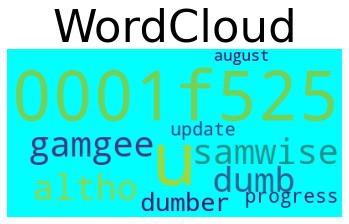

In [46]:
wordcl = WordCloud(background_color='cyan').generate(txt)
plt.imshow(wordcl)
plt.axis('off')
plt.title('WordCloud', size = 45)

# Emotion Mining

In [48]:
afinn = pd.read_csv('Afinn.csv',sep = ',',encoding= 'Latin_1')
afinn.shape

(2477, 2)

In [49]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [50]:
sentence

['I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level .',
 'Have you tried it ?',
 'Great interview !',
 'Doge is underestimated Congratulations Tesla China for amazing execution last year .',
 'Now on to the next for even more !',
 '!',
 'Happy New Year of the Ox !',
 'Frodo was the underdoge , All thought he would fail , Himself most of all .',
 'Haha thanks :) Indeed !',
 'Tweets definitely do not represent real-world time allocation .',
 'The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway toge

In [51]:
sent_df = pd.DataFrame(sentence,columns= ['sentence'])
sent_df


,sentence
0,I  m an alien Ray tracing on Cyberpunk with H...
1,Have you tried it ?
2,Great interview !
3,Doge is underestimated Congratulations Tesla C...
4,Now on to the next for even more !
...,...
971,"Not actually a payout , just a vesting of stoc..."
972,"It may never pay out , as the stock can  t b ..."
973,Details Aug 28 .
974,AI symbiosis while u wait There  s some of th...


In [52]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [53]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
        return sent_score

In [54]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [55]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    14
1     5
2     3
3    12
4     9
5     1
6     7
7    16
8     5
9     9
Name: word_count, dtype: int64

In [56]:
sent_df

,sentence,sentiment_value,word_count
0,I  m an alien Ray tracing on Cyberpunk with H...,0,14
1,Have you tried it ?,0,5
2,Great interview !,3,3
3,Doge is underestimated Congratulations Tesla C...,3,12
4,Now on to the next for even more !,0,9
...,...,...,...
971,"Not actually a payout , just a vesting of stoc...",0,12
972,"It may never pay out , as the stock can  t b ...",-4,34
973,Details Aug 28 .,0,4
974,AI symbiosis while u wait There  s some of th...,-2,47


In [57]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
866,Might be able to Whether commercial or governm...,11,61
169,It will most likely make sense for Starlink to...,11,85
196,"Also , w Oh and umm I absolutely support trans...",12,96
45,"Cryoproof , then install engines Starship SN9 ...",12,72
682,It  s Tesla Germany designed & built the vacc...,13,69
87,This is a good one I whistle Cybertruck doesn ...,13,31
618,The  open  areas Shaped like a diamond & ali...,14,140
757,We just haven  t observed the Pretty much Cyb...,16,65
39,"Yes , but engines have a min throttle point wh...",16,229
112,Was also thinking that SpaceX Boca should hold...,16,85


In [58]:
sent_df['sentiment_value'].describe()

count    976.000000
mean       1.366803
std        2.695616
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [59]:
sent_df[sent_df['sentiment_value']<=0].head(10)

,sentence,sentiment_value,word_count
0,I  m an alien Ray tracing on Cyberpunk with H...,0,14
1,Have you tried it ?,0,5
4,Now on to the next for even more !,0,9
5,!,0,1
6,Happy New Year of the Ox !,0,7
7,"Frodo was the underdoge , All thought he would...",-2,16
9,Tweets definitely do not represent real-world ...,0,9
11,Yes Once we can predict cash flow reasonably w...,0,23
12,"However , if we don SpaceX needs to pass throu...",-2,38
13,Must be scalable to g It  s meant to be the s...,0,18


In [62]:
sent_df[sent_df['sentiment_value']>=15].head(10)

,sentence,sentiment_value,word_count
39,"Yes , but engines have a min throttle point wh...",16,229
112,Was also thinking that SpaceX Boca should hold...,16,85
757,We just haven  t observed the Pretty much Cyb...,16,65


In [63]:
sent_df['index']=range(0,len(sent_df))

## Visualization

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

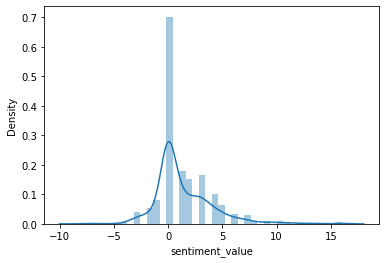

In [64]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

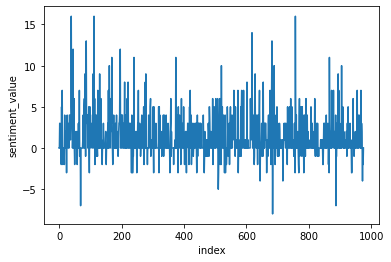

In [65]:
sns.lineplot(y = 'sentiment_value', x = 'index',data = sent_df)